In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from fuzzylab import *
from skfuzzy import control as ctrl
import skfuzzy as fuzz
from numpy.linalg import multi_dot
from scipy.integrate import odeint

In [2]:
class FuzzySystem ():
    def __init__(self):
 
        # Create x1e x1ree fuzzy variables - two inputs (x1,x2) and one control input (d)
        self.x1 = ctrl.Antecedent(np.linspace(0,1,1000),'x1')
        self.x2 = ctrl.Antecedent(np.linspace(0,1,1000),'x2')
        self.d = ctrl.Consequent(np.linspace(0,1,1000),'d')

        #Create fuzzy set for x1
        self.x1['small'] = fuzz.trapmf(self.x1.universe, [0,0,0.12,0.15])
        self.x1['medium'] = fuzz.trapmf(self.x1.universe, [0.12,0.15,0.32,0.35])
        self.x1['large'] = fuzz.trapmf(self.x1.universe, [0.32,0.35,0.52,0.55])
        self.x1['extra_large'] = fuzz.trapmf(self.x1.universe, [0.52,0.55,1,1])
        
        #Create fuzzy set for x2
        self.x2['small'] = fuzz.trapmf(self.x2.universe, [0.85,0.87,1,1])
        self.x2['medium'] = fuzz.trapmf(self.x2.universe, [0.65,0.67,0.85,0.87])
        self.x2['large'] =fuzz.trapmf(self.x2.universe, [0.35,0.37,0.65,0.67])
        self.x2['extra_large'] = fuzz.trapmf(self.x2.universe, [0,0,0.35,0.37])

        #Create fuzzx2 set for control input d
        self.d['no_danger'] = fuzz.trapmf(self.d.universe, [0,0,0.08,0.1])
        self.d['little_danger'] = fuzz.trapmf(self.d.universe, [0.08,0.1,0.42,0.45])
        self.d['moderate_danger'] =fuzz.trapmf(self.d.universe, [0.42,0.45,0.72,0.75])
        self.d['high_danger'] = fuzz.trapmf(self.d.universe, [0.72,0.75,1,1])
    
        #Create fuzzx2 rules
        #General Rules:
        rule0 = ctrl.Rule(antecedent=(self.x1['small'] & self.x2['small']),
                                     consequent=self.d['no_danger'], label='rule no danger 0')
        rule1 = ctrl.Rule(antecedent=(self.x1['small'] & self.x2['medium']),
                                     consequent=self.d['no_danger'], label='rule no danger 1')
        rule2 = ctrl.Rule(antecedent=(self.x1['small'] & self.x2['large']),
                                     consequent=self.d['little_danger'], label='rule little danger 2')
        rule3 = ctrl.Rule(antecedent=(self.x1['small'] & self.x2['extra_large']),
                                     consequent=self.d['moderate_danger'], label='rule moderate danger 3')
        rule4 = ctrl.Rule(antecedent=(self.x1['medium'] & self.x2['small']),
                                     consequent=self.d['no_danger'], label='rule no danger 4')
        rule5 = ctrl.Rule(antecedent=(self.x1['medium'] & self.x2['medium']),
                                     consequent=self.d['moderate_danger'], label='rule moderate danger 5')
        rule6 = ctrl.Rule(antecedent=(self.x1['medium'] & self.x2['large']),
                                     consequent=self.d['moderate_danger'], label='rule moderate danger 6')
        rule7 = ctrl.Rule(antecedent=(self.x1['medium'] & self.x2['extra_large']),
                                     consequent=self.d['high_danger'], label='rule high danger 7')
        rule8 = ctrl.Rule(antecedent=(self.x1['large'] & self.x2['small']),
                                     consequent=self.d['no_danger'], label='rule no danger 8')
        rule9 = ctrl.Rule(antecedent=(self.x1['large'] & self.x2['medium']),
                                     consequent=self.d['moderate_danger'], label='rule moderate danger 9')
        rule10 = ctrl.Rule(antecedent=(self.x1['large'] & self.x2['large']),
                                     consequent=self.d['high_danger'], label='rule high danger 10')
        rule11 = ctrl.Rule(antecedent=(self.x1['large'] & self.x2['extra_large']),
                                     consequent=self.d['high_danger'], label='rule high danger 11')
        rule12 = ctrl.Rule(antecedent=(self.x1['extra_large'] & self.x2['small']),
                                     consequent=self.d['little_danger'], label='rule little danger 12')
        rule13 = ctrl.Rule(antecedent=(self.x1['extra_large'] & self.x2['medium']),
                                     consequent=self.d['moderate_danger'], label='rule moderate danger 13')
        rule14 = ctrl.Rule(antecedent=(self.x1['extra_large'] & self.x2['large']),
                                     consequent=self.d['high_danger'], label='rule high danger 14')
        rule15 = ctrl.Rule(antecedent=(self.x1['extra_large'] & self.x2['extra_large']),
                                     consequent=self.d['high_danger'], label='rule high danger 15')
       

        system = ctrl.ControlSystem(rules=[rule0, rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
        self.tipping = ctrl.ControlSystemSimulation(system)
        
    def plot(self):
        #Plot fuzzy sets
        plt.subplots(3,1,figsize=(15,10))
        plt.subplot(3,1,1)
        plt.title("Input Variable x1")
        plt.plot(self.x1.universe,fuzz.trapmf(self.x1.universe, [0,0,0.12,0.15]),label="small")
        plt.plot(self.x1.universe,fuzz.trapmf(self.x1.universe, [0.12,0.15,0.32,0.35]),label="medium")
        plt.plot(self.x1.universe,fuzz.trapmf(self.x1.universe, [0.32,0.35,0.52,0.55]),label="large")
        plt.plot(self.x1.universe,fuzz.trapmf(self.x1.universe, [0.52,0.55,1,1]),label="extra_large")
        plt.legend()
        
        plt.subplot(3,1,2)
        plt.title("Input Variable x2")
        plt.plot(self.x2.universe,fuzz.trapmf(self.x2.universe, [0.85,0.87,1,1]),label="small")
        plt.plot(self.x2.universe,fuzz.trapmf(self.x2.universe, [0.65,0.67,0.85,0.87]),label="medium")
        plt.plot(self.x2.universe,fuzz.trapmf(self.x2.universe, [0.35,0.37,0.65,0.67]),label="large")
        plt.plot(self.x2.universe,fuzz.trapmf(self.x2.universe, [0,0,0.35,0.37]),label="extra_large")
        plt.legend()
        
        plt.subplot(3,1,3)
        plt.title("Output d")
        plt.plot(self.d.universe,fuzz.trapmf(self.d.universe, [0,0,0.08,0.1]),label="no_danger")
        plt.plot(self.d.universe,fuzz.trapmf(self.d.universe, [0.08,0.1,0.42,0.45]),label="little_danger")
        plt.plot(self.d.universe,fuzz.trapmf(self.d.universe, [0.42,0.45,0.72,0.75]),label="moderate_danger")
        plt.plot(self.d.universe,fuzz.trapmf(self.d.universe, [0.72,0.75,1,1]),label="high_danger")
        plt.legend()
        plt.show()
    
    def get_centers(self):
        
        centers = {}
        
        centers['no_danger'] = (0+0.1)/2
        centers['little_danger'] = (0.08+0.45)/2
        centers['moderate_danger'] = (0.42+0.75)/2
        centers['high_danger'] = (0.72+1)/2
        
        return centers
        
    def get_result (self,x1_percentage,x2_percentage):
        self.tipping.input['x1'] = x1_percentage
        self.tipping.input['x2'] = x2_percentage
        self.tipping.compute()
        ex=self.tipping.output['d']
        return (ex)
    


In [3]:
fs = FuzzySystem()

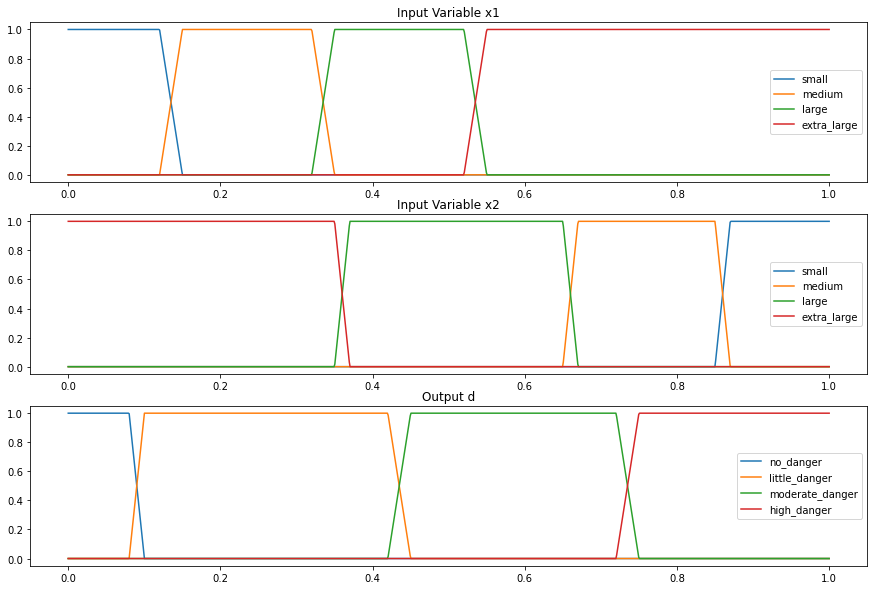

In [4]:
fs.plot()

In [5]:
def meh(x, t, a, b):
    x1, x2 = x
    dx1dt = -a*x1 + b*x1*x2
    dx2dt = -b*x1*x2
    dxdt = [dx1dt, dx2dt]
    return dxdt
    


def simulate(x0, a, b):
    
    t = np.arange(0,time,Ts)
    initial = x0
    xs = []
    xs.append(x0)

    for i in range(1,len(t)):
        tspan = [t[i], t[i-1]]
        x = odeint(meh, x0, tspan, args=(a, b))
        xs.append(x[1])
        x0 = x[1]

    xs = np.array(xs)
    x1 = []
    x2 = []
    j1 = 0
    j2 = 0
    for i in range(len(xs)):
        
        if (xs[i, 0] <= 1) & (xs[i, 0] >= 0):
            x1.append(xs[i, 0])
        
        if (xs[i, 1] <= 1) & (xs[i, 1] >= 0):
            x2.append(xs[i, 1])
            
    if len(x1) >= len(x2):
        samples = len(x2)
    else:
        samples = len(x1)
    t1 = np.linspace(0,time, len(x1))
    t2 = np.linspace(0,time, len(x2))
    plt.figure(figsize=(10,5))
    plt.plot(t1, x1, 'b', label='Patient Percentage')
    plt.plot(t2, x2, 'g', label='Non-Patient Percentage')
    plt.legend(loc='best')
    plt.xlabel('Time Units')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.title(f'Spreading of Covid-19 for Initial Conditions x0 = [{str(initial[0])}, {str(initial[1])}] with a = {a}, b = {b}')
    plt.show()
    
    danger = []
    for i in range(samples):
        danger.append(fs.get_result(x1[i], x2[i]))
    
    return danger

In [6]:
def find_perc(dist1, dist2, danger):
    res = abs(dist1/(dist2))
    return res
    

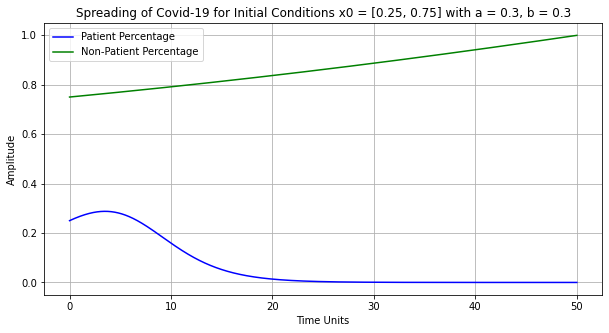

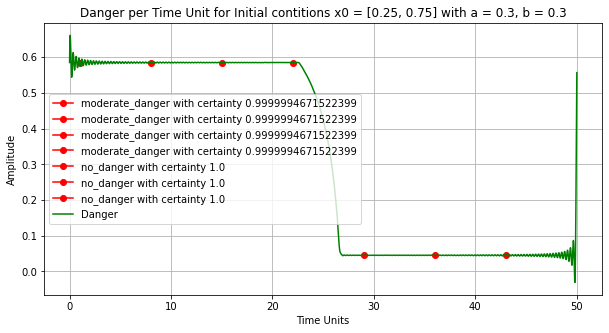

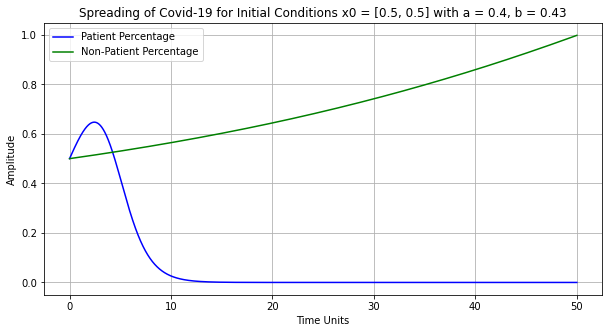

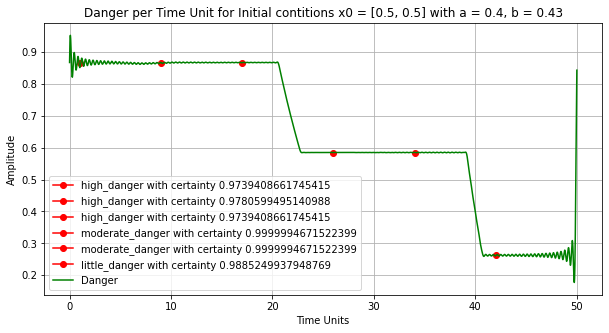

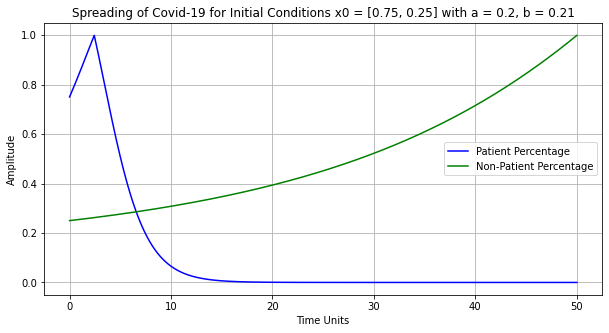

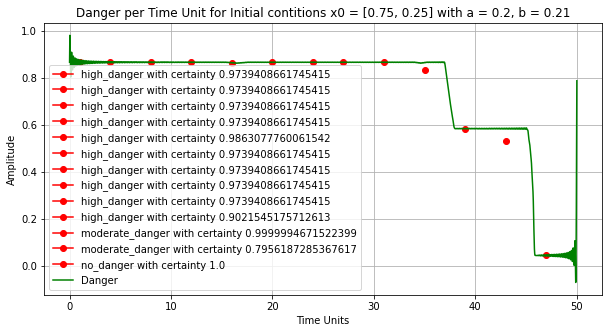

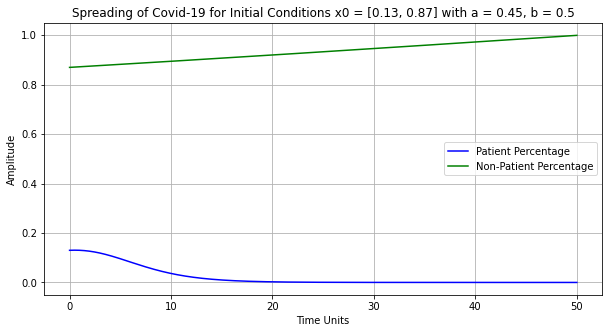

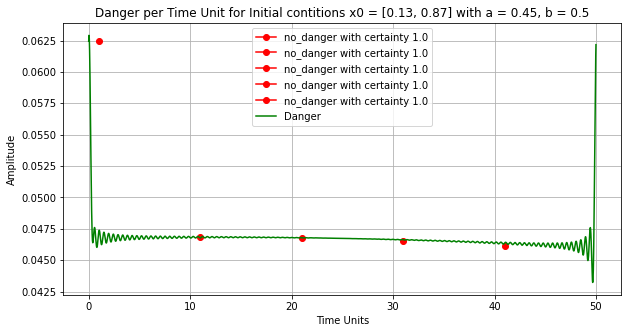

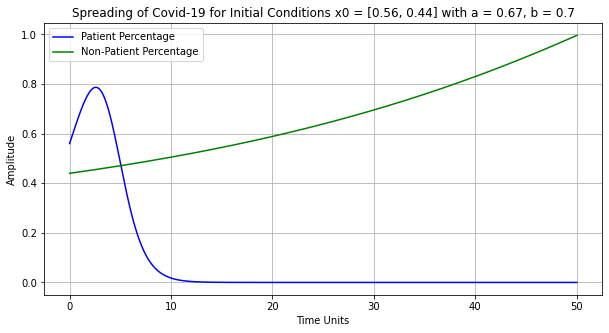

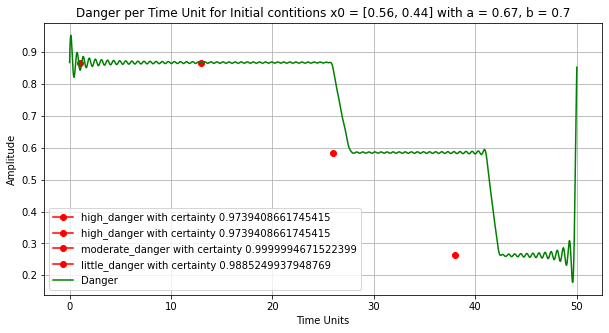

In [7]:
from scipy import signal
time = 50
Ts = 0.01
centers = fs.get_centers()
percentages = []
a, b = [.3, .4, .2, .45, .67], [.3, .43, .21, .5, .7]
x0 = [[.25, .75], [.5, .5], [.75, .25], [.13, .87], [.56, .44]]
t = np.linspace(0, time, int(time//Ts)+1)
offset  = 0
for i in range(len(x0)):
    
    danger = simulate(x0[i], a[i], b[i])
    samples = []
    percentages = []
    for j in range(0, len(danger), 50):
        samples.append(j)
        dist1 = np.inf
        dist2 = np.inf
        linguistic = 0
        for center in centers.keys():
            if dist1 > abs(danger[j] - centers[center]):
                dist2 = dist1
                dist1 = abs(danger[j] - centers[center])
                linguistic = center
                    
        percentages.append([linguistic, find_perc(dist1, dist2, danger[j])])
        
        
    fig = plt.figure(figsize=(10,5))
    for j in range(len(percentages)):
        plt.plot(int(samples[j]//len(percentages))+1,danger[samples[j]],marker="o",color="red" ,label=percentages[j][0]+' with certainty '+str(1-percentages[j][1]))
    plt.plot(t, signal.resample(danger, int(time//Ts+1)), 'g', label='Danger')
    plt.legend(loc='best')
    plt.xlabel('Time Units')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.title(f'Danger per Time Unit for Initial contitions x0 = [{str(x0[i][0])}, {str(x0[i][1])}] with a = {a[i]}, b = {b[i]}')
    plt.show()
